In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pymysql
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import seaborn as sns
import dataframe_image as dfi

conn = pymysql.connect(
    host="127.0.0.1",
    port=3306,
    db="oaims",
    user="root",
    password="abcd1234")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Case Study 1

A. Number of jobs reviewed: Amount of jobs reviewed over time.
Your task: Calculate the number of jobs reviewed per hour per day for November 2020?

In [2]:
query='''SELECT ds AS Date, COUNT(job_id) AS Cnt_JID, ROUND((SUM(time_spent)/3600),2) AS Tot_Time_Sp_Hr, ROUND((COUNT(job_id)/(SUM(time_spent)/3600)),2) AS Job_Rev_PHr_PDy 
        FROM cs_1 
        WHERE ds BETWEEN \'01-11-2020\' AND \'30-11-2020\'
        GROUP BY ds 
        ORDER BY ds'''

df1=pd.read_sql_query(query, conn)

In [3]:
df1

,Date,Cnt_JID,Tot_Time_Sp_Hr,Job_Rev_PHr_PDy
0,01-11-2020,39,1.07,36.60
1,02-11-2020,40,1.08,37.08
2,03-11-2020,25,0.79,31.63
3,04-11-2020,34,0.92,36.95
4,05-11-2020,36,0.91,39.69
5,06-11-2020,32,0.98,32.53
6,07-11-2020,42,1.12,37.62
7,08-11-2020,29,0.82,35.20
8,09-11-2020,36,0.90,39.89
9,10-11-2020,41,1.29,31.77


In [4]:
dfi.export(df1[0:15],"1Aa.png")
dfi.export(df1[15:],"1Ab.png")

In [7]:
df1['5_Dy_Roll_Avg']=df1['Job_Rev_PHr_PDy'].rolling(5, min_periods=1).mean().round(2)

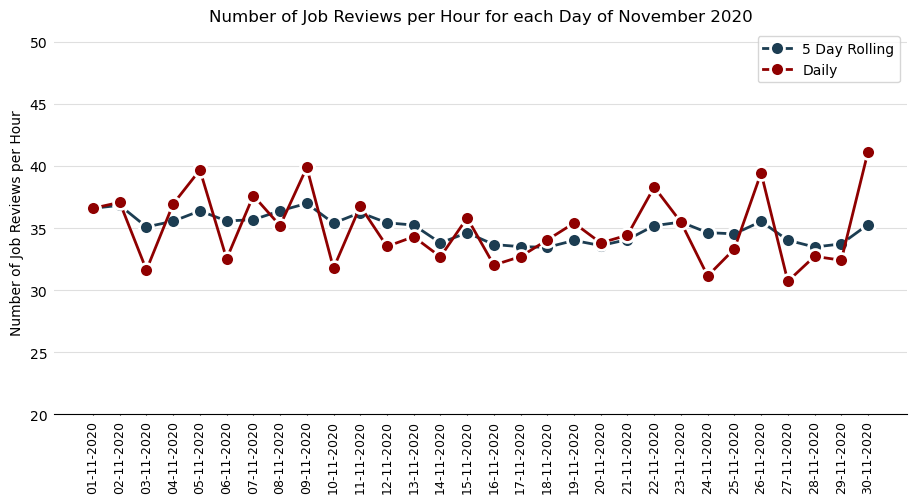

In [8]:
fig, ax=plt.subplots(1,1, figsize=(11,5))

l1=ax.plot(df1['Date'].values, df1['5_Dy_Roll_Avg'].values, linewidth=2, markersize=10, marker='o', markerfacecolor='#1c3d52', color='#1c3d52', markeredgecolor='white', markeredgewidth=2, label='5 Day Rolling')
l2=ax.plot(df1['Date'].values, df1['Job_Rev_PHr_PDy'].values, linewidth=2, markersize=10, marker='o', markerfacecolor='#8f0000', color='#8f0000', markeredgecolor='white', markeredgewidth=2, label='Daily')

ax.tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=90)
ax.set_ylim(20, 51)
ax.set_yticks(list(np.arange(20, 51,5)))
ax.tick_params(axis='y', pad=5, length=0)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:#, 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_title("Number of Job Reviews per Hour for each Day of November 2020")
ax.set_ylabel("Number of Job Reviews per Hour")

ax.grid(axis='y', alpha=0.4)
ax.set_axisbelow(True)

ax.legend()

plt.show()

B. Throughput: It is the no. of events happening per second.
Your task: Let’s say the above metric is called throughput. Calculate 7 day rolling average of throughput? For throughput, do you prefer daily metric or 7-day rolling and why?

In [17]:
query="""WITH d AS (
        SELECT ds, CAST(COUNT(job_id) AS FLOAT)/CAST(SUM(time_spent) AS FLOAT) AS c_by_s
        FROM cs_1
        WHERE ds BETWEEN \'01-11-2020\' AND \'30-11-2020\'
        GROUP BY 1 )
        
        SELECT ds AS Date, c_by_s AS Job_Rev_PSec_PDy, AVG(c_by_s) OVER(ORDER BY ds ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS 7_Dy_Roll_Avg
        FROM d"""

df2=pd.read_sql_query(query, conn)

In [18]:
df2

,Date,Job_Rev_PSec_PDy,7_Dy_Roll_Avg
0,01-11-2020,0.010167,0.010167
1,02-11-2020,0.010301,0.010234
2,03-11-2020,0.008787,0.009752
3,04-11-2020,0.010263,0.009880
4,05-11-2020,0.011026,0.010109
5,06-11-2020,0.009037,0.009930
6,07-11-2020,0.010450,0.010004
7,08-11-2020,0.009777,0.009949
8,09-11-2020,0.011080,0.010060
9,10-11-2020,0.008825,0.010066


In [73]:
dfi.export(df2[0:15],"1Ba.png")
dfi.export(df2[15:],"1Bb.png")

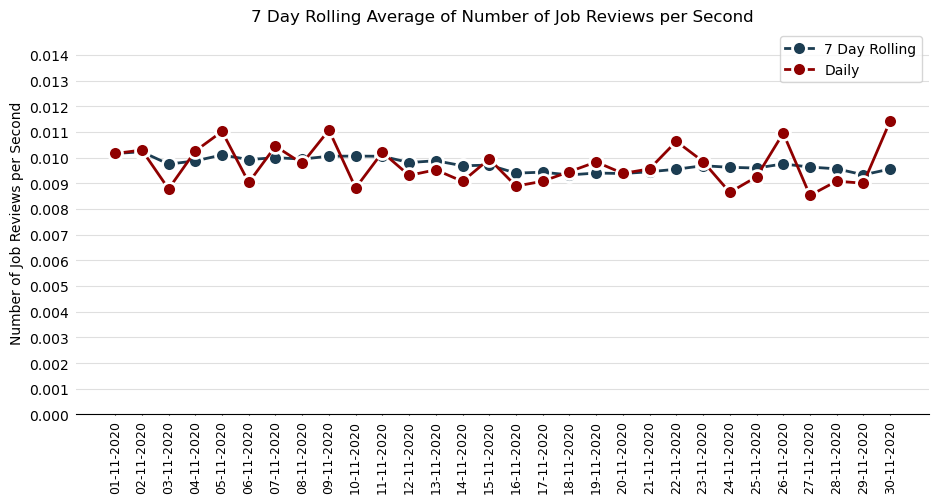

In [12]:
fig, ax=plt.subplots(1,1, figsize=(11,5))

l1=ax.plot(df2['Date'].values, df2['7_Dy_Roll_Avg'].values, linewidth=2, markersize=10, marker='o', markerfacecolor='#1c3d52', color='#1c3d52', markeredgecolor='white', markeredgewidth=2, label='7 Day Rolling')
l2=ax.plot(df2['Date'].values, df2['Job_Rev_PSec_PDy'].values, linewidth=2, markersize=10, marker='o', markerfacecolor='#8f0000', color='#8f0000', markeredgecolor='white', markeredgewidth=2, label='Daily')

ax.tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=90)
ax.set_ylim(0, 0.015)
ax.set_yticks(list(np.arange(0, 0.015, 0.001)))
ax.tick_params(axis='y', pad=5, length=0)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:#, 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_title("7 Day Rolling Average of Number of Job Reviews per Second")
ax.set_ylabel("Number of Job Reviews per Second")

ax.grid(axis='y', alpha=0.4)
ax.set_axisbelow(True)

ax.legend()

plt.show()

Percentage share of each language: Share of each language for different contents.
Your task: Calculate the percentage share of each language in the last 30 days?

In [12]:
query="""WITH d AS (
        SELECT language, COUNT(language) AS cnt
        FROM cs_1 
        WHERE ds BETWEEN \'01-11-2020\' AND \'30-11-2020\'
        GROUP BY language )
        
        SELECT language AS Language, cnt AS Tot_Cnt_Lang, ROUND((100*cnt/SUM(cnt) OVER()),2) AS Perc_Share_Lang 
        FROM d 
        ORDER BY Perc_Share_Lang DESC"""

df3=pd.read_sql_query(query, conn)

In [13]:
df3

,Language,Tot_Cnt_Lang,Perc_Share_Lang
0,Arabic,199,18.17
1,English,186,16.99
2,Hindi,183,16.71
3,Persian,180,16.44
4,French,178,16.26
5,Italian,169,15.43


In [8]:
dfi.export(df3, "1C.png")

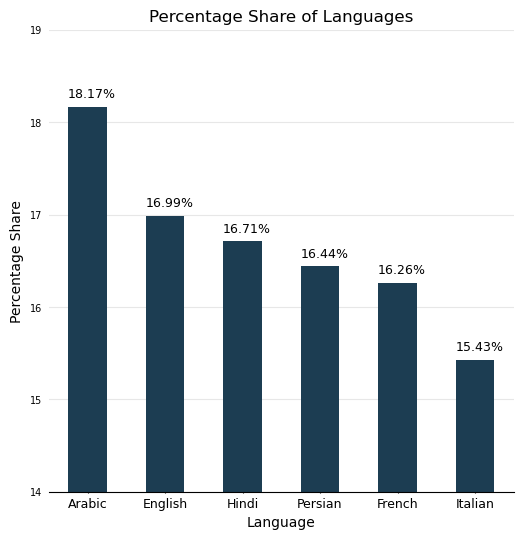

In [9]:
fig, ax=plt.subplots(1,1, figsize=(6,6))

ax=df3['Perc_Share_Lang'].plot.bar(ylim=(14,19), rot=0, xlabel="Language", ylabel="Percentage Share", title="Percentage Share of Languages", color='#1c3d52')

for r in ax.patches:
    ax.annotate(f"{r.get_height()}%", xy=(r.get_x(), r.get_y()+r.get_height()+0.1), rotation=0, size=9)
    
x_tck=df3['Language'].values 
ax.set_xticks(ticks=list(range(0,6)), labels=x_tck)
ax.tick_params(axis='x', pad=3, length=1, labelsize=9)
ax.set_yticks(list(range(14,20)))
ax.tick_params(axis='y', pad=5, length=0, labelsize=7)

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# The axis lines from top, left and right are removed
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

Duplicate rows: Rows that have the same value present in them.
Your task: Let’s say you see some duplicate rows in the data. How will you display duplicates from the table?

In [14]:
query="""SELECT * 
        FROM cs_1 
        GROUP BY ds, job_id, actor_id, event, language, time_spent, org 
        HAVING COUNT(*)>1"""

df4a=pd.read_sql_query(query, conn)

In [15]:
df4a

,ds,job_id,actor_id,event,language,time_spent,org


In [16]:
dfi.export(df4a, "1Da.png")

In [23]:
query1a="""SELECT job_id, COUNT(job_id) AS Cnt_JID FROM cs_1 
           GROUP BY job_id 
           HAVING Cnt_JID>1
           ORDER BY job_id"""

df4b=pd.read_sql_query(query1a, conn)

query1b="""SELECT cs_1.* 
           FROM cs_1 
           JOIN ({}) AS q1 
           ON cs_1.job_id=q1.job_id 
           ORDER BY cs_1.job_id""".format(query1a)

df4c=pd.read_sql_query(query1b, conn)

In [29]:
df4b

,job_id,Cnt_JID
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


In [22]:
dfi.export(df4b[0:11], "1Dba.png")
dfi.export(df4b[11:22], "1Dbb.png")
dfi.export(df4b[22:33], "1Dbc.png")
dfi.export(df4b[33:44], "1Dbd.png")
dfi.export(df4b[44:55], "1Dbe.png")
dfi.export(df4b[55:66], "1Dbf.png")
dfi.export(df4b[66:77], "1Dbg.png")
dfi.export(df4b[77:], "1Dbh.png")

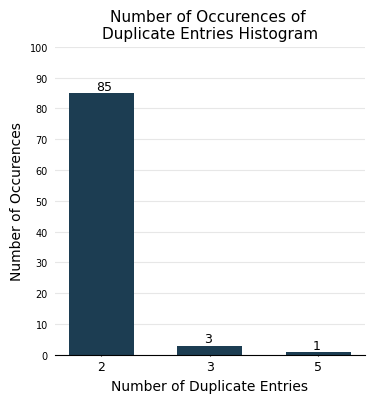

In [93]:
fig, ax=plt.subplots(1,1, figsize=(4,4))

ax.hist(df4b['Cnt_JID'], bins=3, rwidth=0.6, color='#1c3d52')

for r in ax.patches:
    ax.annotate(f"{int(r.get_height())}", xy=(r.get_x()+0.25, r.get_y()+r.get_height()+1), rotation=0, size=9)
    
ax.set_xticks(ticks=[2.5, 3.5, 4.5], labels=[2, 3, 5])
ax.tick_params(axis='x', pad=3, length=1, labelsize=9)
ax.set_yticks(list(range(0, 101, 10)))
ax.tick_params(axis='y', pad=5, length=0, labelsize=7)

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# The axis lines from top, left and right are removed
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_title('Number of Occurences of \nDuplicate Entries Histogram', fontsize=11)
ax.set_xlabel('Number of Duplicate Entries')
ax.set_ylabel('Number of Occurences')

plt.show()

In [49]:
df4c

,ds,job_id,actor_id,event,language,time_spent,org
0,02-11-2020,1,1819,decision,Persian,32,A
1,01-11-2020,1,1509,transfer,Arabic,20,D
2,10-11-2020,2,1270,transfer,Italian,175,D
3,24-11-2020,2,2011,decision,Persian,169,C
4,15-11-2020,3,1266,skip,Hindi,48,D
5,18-11-2020,3,2024,decision,French,60,A
6,29-11-2020,4,1387,decision,Hindi,180,C
7,08-11-2020,4,1512,skip,English,200,A
8,23-11-2020,5,1966,skip,Hindi,52,B
9,23-11-2020,5,1316,decision,Persian,143,D


In [26]:
dfi.export(df4c[0:46], "1Dca.png")
dfi.export(df4c[46:92], "1Dcb.png")
dfi.export(df4c[92:138], "1Dcc.png")
dfi.export(df4c[138:], "1Dcd.png")

In [95]:
query2a="""SELECT actor_id, COUNT(actor_id) AS Cnt_AID 
           FROM cs_1 
           GROUP BY actor_id 
           HAVING Cnt_AID>1
           ORDER BY actor_id"""

df4d=pd.read_sql_query(query2a, conn)

query2b="""SELECT cs_1.* 
           FROM cs_1 
           JOIN ({}) AS q1 
           ON cs_1.actor_id=q1.actor_id 
           ORDER BY cs_1.actor_id""".format(query2a)

df4e=pd.read_sql_query(query2b, conn)

In [96]:
df4d

,actor_id,Cnt_AID
0,1001,2
1,1002,2
2,1003,3
3,1004,2
4,1005,2
5,1006,2
6,1007,2


In [97]:
dfi.export(df4d, "1Dd.png")

In [98]:
df4e

,ds,job_id,actor_id,event,language,time_spent,org
0,30-11-2020,21,1001,skip,English,15,A
1,04-11-2020,734,1001,skip,English,75,A
2,28-11-2020,25,1002,decision,Hindi,11,B
3,17-11-2020,365,1002,transfer,Italian,138,C
4,29-11-2020,23,1003,decision,Persian,20,C
5,25-11-2020,20,1003,transfer,Italian,45,C
6,18-11-2020,325,1003,transfer,Persian,79,B
7,26-11-2020,23,1004,skip,Persian,56,A
8,21-11-2020,919,1004,skip,Persian,73,D
9,28-11-2020,23,1005,transfer,Persian,22,D


In [99]:
dfi.export(df4e, "1De.png")

Case Study 2

User Engagement: To measure the activeness of a user. Measuring if the user finds quality in a product/service.
Your task: Calculate the weekly user engagement?

In [106]:
query1='''SELECT user_id, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', DATE_FORMAT(STR_TO_DATE(occurred_at, \'%d-%m-%Y %H:%i\'), \'%Y-%m-%d %H:%i:%S\')) AS wk 
        FROM cs_2_T_2
        WHERE event_type = \'engagement\''''

query2='''SELECT user_id, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', occurred_at) AS wk 
        FROM cs_2_T_3'''

query3='''SELECT * 
        FROM ({}) AS q1 
        
        UNION ALL 
        
        SELECT * FROM ({}) AS q2 
        ORDER BY user_id'''.format(query1, query2)

query4='''SELECT user_id, wk, COUNT(user_id) AS Count 
        FROM ({}) AS q3 
        GROUP BY user_id, wk 
        ORDER BY user_id'''.format(query3)

query5='''SELECT ROUND(AVG(Count),2) AS Avg_Weekly_User_Eng
        FROM ({}) AS q4 '''.format(query4)

df1=pd.read_sql_query(query5, conn)

In [107]:
df1

,Avg_Weekly_User_Eng
0,6.43


In [108]:
dfi.export(df1, "2A.png")

User Growth: Amount of users growing over time for a product.
Your task: Calculate the user growth for product?

In [115]:
query1='''SELECT DATE(STR_TO_DATE(created_at, \'%Y-%m-%d %H:%i:%s\')) AS dt, COUNT(user_id) AS cnt
        FROM cs_2_t_1
        GROUP BY dt'''

query2='''SELECT dt, cnt, SUM(cnt) OVER (ORDER BY dt) DIV 1 AS cml_cnt
        FROM ({}) AS q1'''.format(query1)

df2=pd.read_sql_query(query2, conn)

In [116]:
df2

,dt,cnt,cml_cnt
0,2013-01-01,13,13
1,2013-01-02,11,24
2,2013-01-03,14,38
3,2013-01-04,11,49
4,2013-01-05,3,52
5,2013-01-06,4,56
6,2013-01-07,13,69
7,2013-01-08,13,82
8,2013-01-09,11,93
9,2013-01-10,12,105


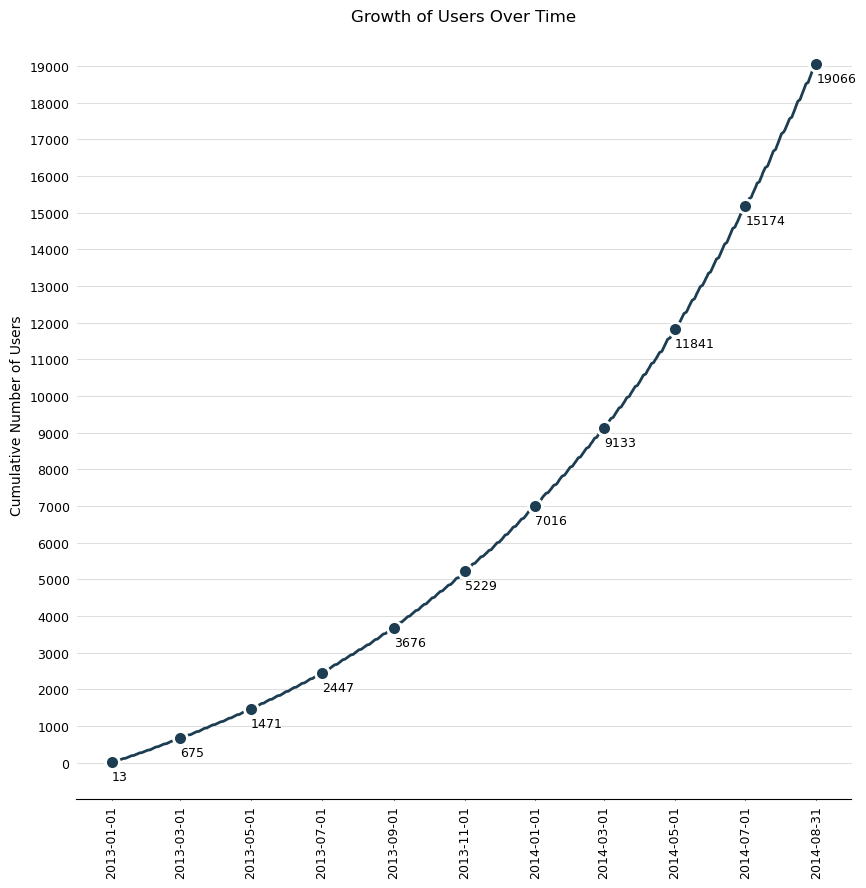

In [117]:
fig, ax=plt.subplots(1,1, figsize=(10,10))

annot_pos=[datetime.date(2013, i, 1) if i<=12 else datetime.date(2014, i-12, 1) for i in list(range(1, 21, 2))]
annot_pos.append(datetime.date(2014, 8, 31))
annot=[df2['cml_cnt'].values[list(df2['dt'].values).index(i)] for i in annot_pos]
marker=[list(df2['dt'].values).index(i) for i in annot_pos]

ax.plot(df2['dt'].values, df2['cml_cnt'].values, linewidth=2, color='#1c3d52', markevery=marker, markersize=10, marker='o', markerfacecolor='#1c3d52', markeredgecolor='white', markeredgewidth=2)

for i in zip(annot_pos, annot):
    ax.annotate(f"{i[1]}", xy=(i[0], i[1]-400), ha='left', va='center', fontfamily='sans-serif', fontsize=9)

ax.set_xticks(annot_pos)
ax.tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=90)
ax.set_ylim(-1000, 20000)
ax.set_yticks(list(range(0, 20000, 1000)))
ax.tick_params(axis='y', pad=5, length=0, labelsize=9)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:#, 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_title("Growth of Users Over Time")
ax.set_ylabel("Cumulative Number of Users")

ax.grid(axis='y', alpha=0.4)
ax.set_axisbelow(True)

plt.show()

Weekly Retention: Users getting retained weekly after signing-up for a product.
Your task: Calculate the weekly retention of users-sign up cohort?

In [19]:
query1='''SELECT user_id, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', activated_at) as week_no
        FROM cs_2_t_1 
        WHERE state = \'active\''''

query2='''SELECT user_id, DATE_FORMAT(STR_TO_DATE(occurred_at, \'%d-%m-%Y %H:%i\'), \'%Y-%m-%d %H:%i:%S\') AS date_time, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', DATE_FORMAT(STR_TO_DATE(occurred_at, \'%d-%m-%Y %H:%i\'), \'%Y-%m-%d %H:%i:%S\')) as week_no 
        FROM cs_2_t_2 
        WHERE event_type = \'engagement\'
        
        UNION ALL
        
        SELECT user_id, occurred_at AS date_time, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', occurred_at) as week_no 
        FROM cs_2_t_3
        
        ORDER BY user_id, week_no'''

query3='''SELECT q1.user_id AS q1id, q1.week_no AS q1wn, q2.user_id AS q2id, q2.week_no AS q2wn
        FROM ({0}) AS q1 
        LEFT OUTER JOIN ({1}) AS q2 
        ON q1.user_id=q2.user_id
        
        UNION
        
        SELECT q1.user_id AS q1id, q1.week_no AS q1wn, q2.user_id AS q2id, q2.week_no AS q2wn
        FROM ({0}) AS q1 
        RIGHT OUTER JOIN ({1}) AS q2 
        ON q1.user_id=q2.user_id'''.format(query1, query2)

query4='''SELECT q3.q1id AS q3id, q3.q1wn AS q3wn1, q3.q2wn AS q3wn2
        FROM ({0}) AS q3
        ORDER BY q3wn1, q3wn2'''.format(query3)

query5='''SELECT q1_.week_no AS q5wn, COUNT(q1_.user_id) AS ttl_ui_cnt
        FROM ({0}) AS q1_
        GROUP BY q5wn'''.format(query1)

query6='''SELECT q4.q3wn1 AS q4wn1, q4.q3wn2 AS q4wn2, COUNT(q4.q3id) AS cnt_q4id 
        FROM ({0}) AS q4
        GROUP BY q3wn1, q3wn2'''.format(query4)

query7='''SELECT q6.q5wn AS q6wn, q7.q4wn2 AS q7wn2, ROUND((100*q7.cnt_q4id/q6.ttl_ui_cnt),2) AS perc_ret
        FROM ({0}) AS q6
        JOIN ({1}) AS q7
        ON (q6.q5wn=q7.q4wn1 AND q6.q5wn<q7.q4wn2)
        ORDER BY q6wn, q7wn2'''.format(query5, query6)

df3=pd.read_sql_query(query7, conn)

In [20]:
df3.dropna(inplace=True, ignore_index=True)
df3['q7wn2']=df3['q7wn2'].apply(lambda x: int(x))
df4=df3.pivot(index='q6wn', columns='q7wn2', values='perc_ret')
msk=df4.isnull()

In [21]:
df4

q7wn2,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
q6wn,,,,,,,,,,,,,,,,,,
0,26.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,46.67,30.00
1,23.53,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,35.29,23.53
2,32.61,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,47.83,36.96
3,42.86,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,40.00
4,42.86,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.14,31.43
5,30.00,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,42.50,35.00
6,29.55,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,45.45,36.36
7,33.33,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,48.72,41.03
8,31.43,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,28.57


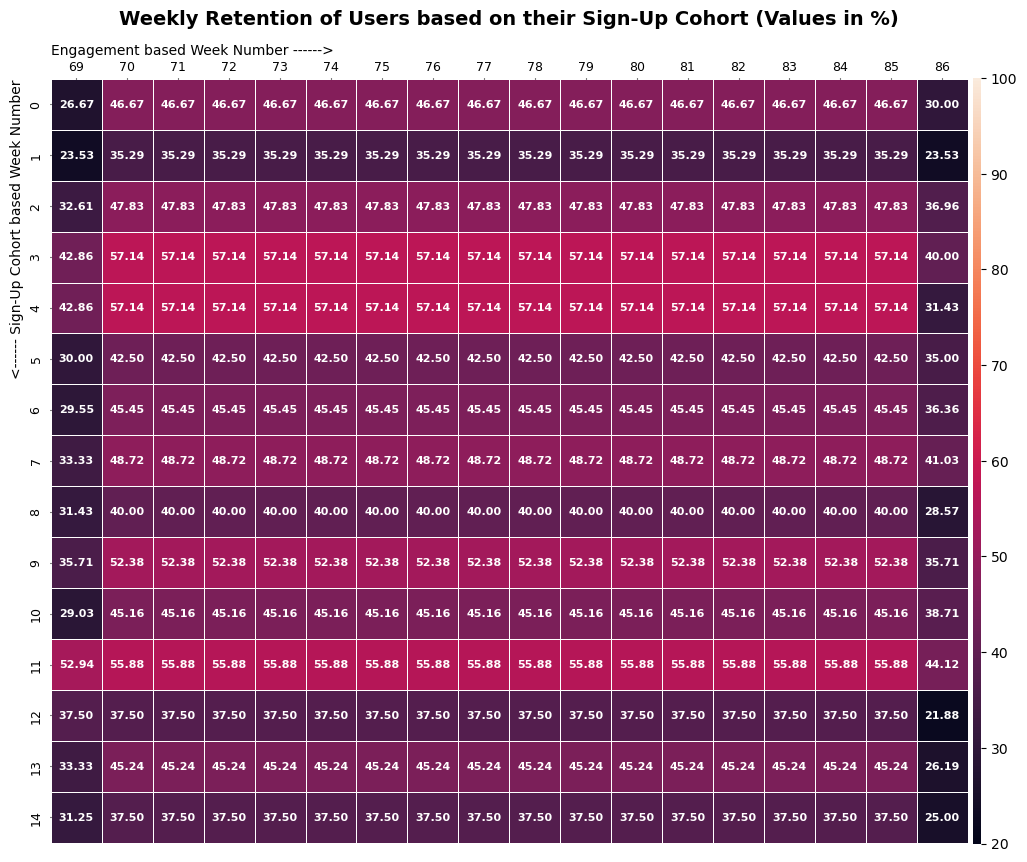

In [25]:
fig, ax=plt.subplots(1,1, figsize=(14,14))

hm=sns.heatmap(df4[0:15], vmin=20, vmax=100, annot=True, fmt=".2f", annot_kws={'fontsize': 8, 'fontweight': 'semibold'}, linewidths=0.5, cbar=True, cbar_kws={'aspect':100, 'shrink': 0.71, 'pad': 0.005}, square=True)

hm.tick_params(axis='x', pad=3, length=1, labelsize=9)
hm.xaxis.tick_top()
hm.set_xlabel("Engagement based Week Number ------>", loc='left')
hm.xaxis.set_label_position('top') 

hm.tick_params(axis='y', pad=5, length=1, labelsize=9)
hm.set_ylabel("<------ Sign-Up Cohort based Week Number", loc='top')

hm.set_title("Weekly Retention of Users based on their Sign-Up Cohort (Values in %)", y=1.06, fontsize=14, fontweight='semibold')

plt.show()

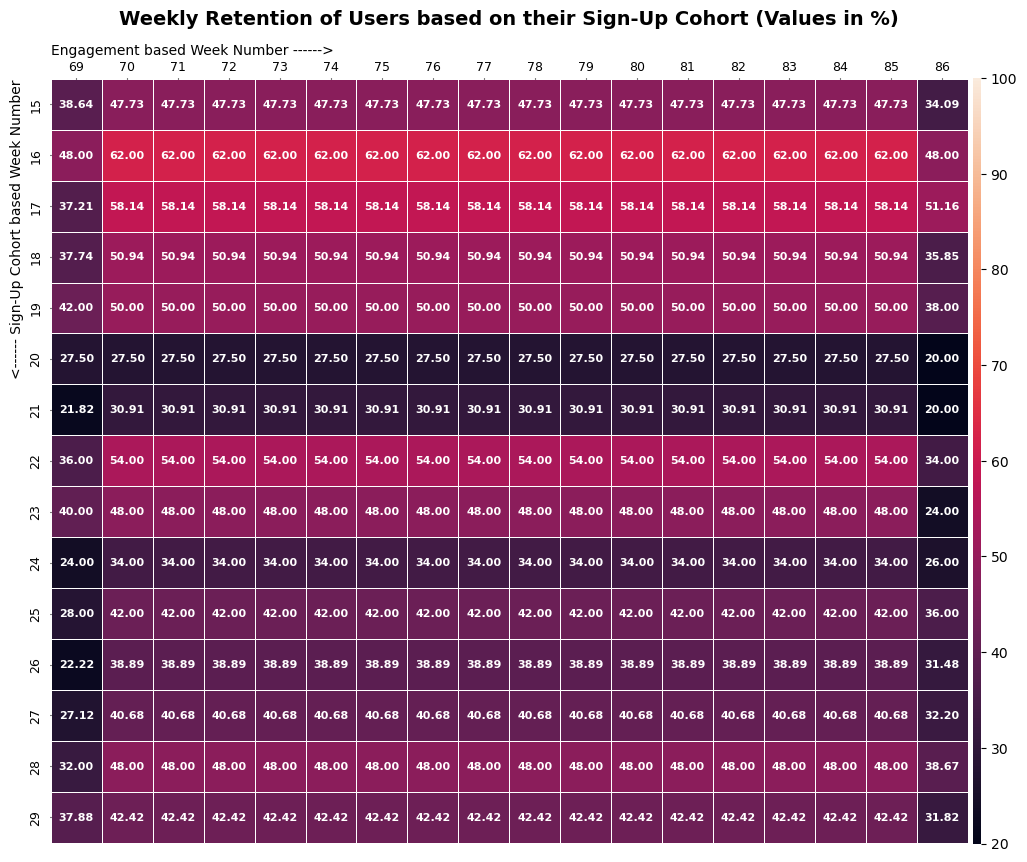

In [26]:
fig, ax=plt.subplots(1,1, figsize=(14,14))

hm=sns.heatmap(df4[15:30], vmin=20, vmax=100, annot=True, fmt=".2f", annot_kws={'fontsize': 8, 'fontweight': 'semibold'}, linewidths=0.5, cbar=True, cbar_kws={'aspect':100, 'shrink': 0.71, 'pad': 0.005}, square=True)

hm.tick_params(axis='x', pad=3, length=1, labelsize=9)
hm.xaxis.tick_top()
hm.set_xlabel("Engagement based Week Number ------>", loc='left')
hm.xaxis.set_label_position('top') 

hm.tick_params(axis='y', pad=5, length=1, labelsize=9)
hm.set_ylabel("<------ Sign-Up Cohort based Week Number", loc='top')

hm.set_title("Weekly Retention of Users based on their Sign-Up Cohort (Values in %)", y=1.06, fontsize=14, fontweight='semibold')

plt.show()

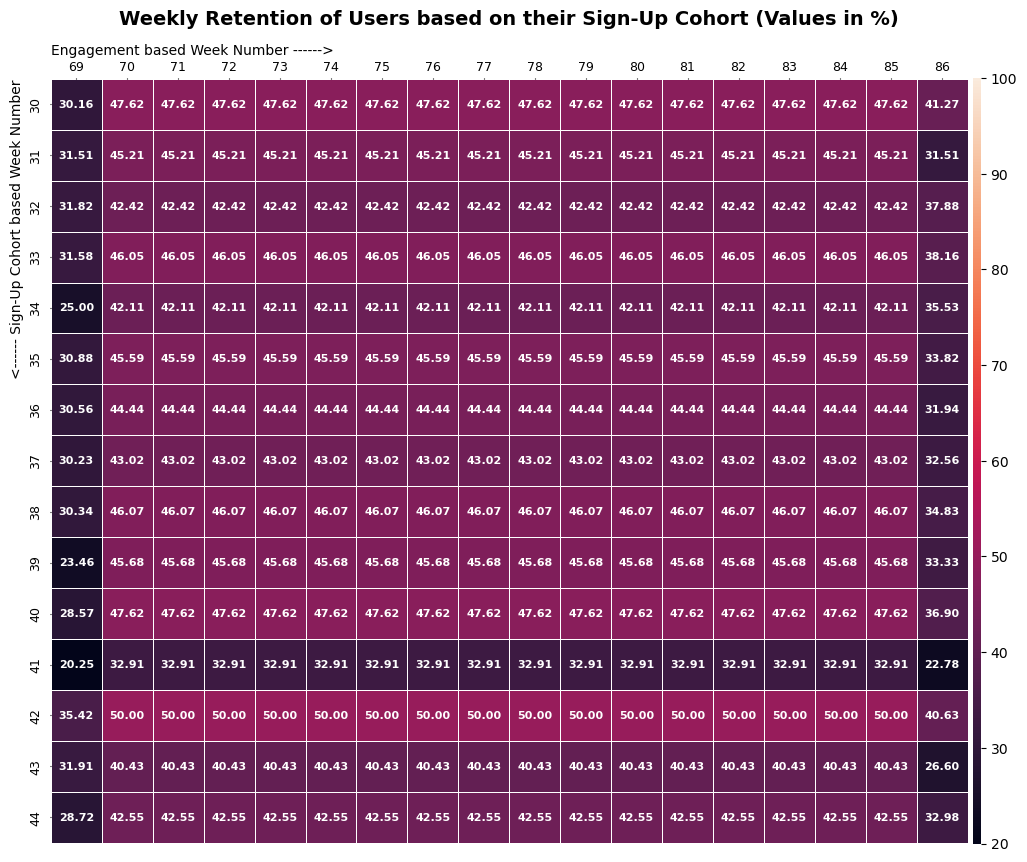

In [27]:
fig, ax=plt.subplots(1,1, figsize=(14,14))

hm=sns.heatmap(df4[30:45], vmin=20, vmax=100, annot=True, fmt=".2f", annot_kws={'fontsize': 8, 'fontweight': 'semibold'}, linewidths=0.5, cbar=True, cbar_kws={'aspect':100, 'shrink': 0.71, 'pad': 0.005}, square=True)

hm.tick_params(axis='x', pad=3, length=1, labelsize=9)
hm.xaxis.tick_top()
hm.set_xlabel("Engagement based Week Number ------>", loc='left')
hm.xaxis.set_label_position('top') 

hm.tick_params(axis='y', pad=5, length=1, labelsize=9)
hm.set_ylabel("<------ Sign-Up Cohort based Week Number", loc='top')

hm.set_title("Weekly Retention of Users based on their Sign-Up Cohort (Values in %)", y=1.06, fontsize=14, fontweight='semibold')

plt.show()

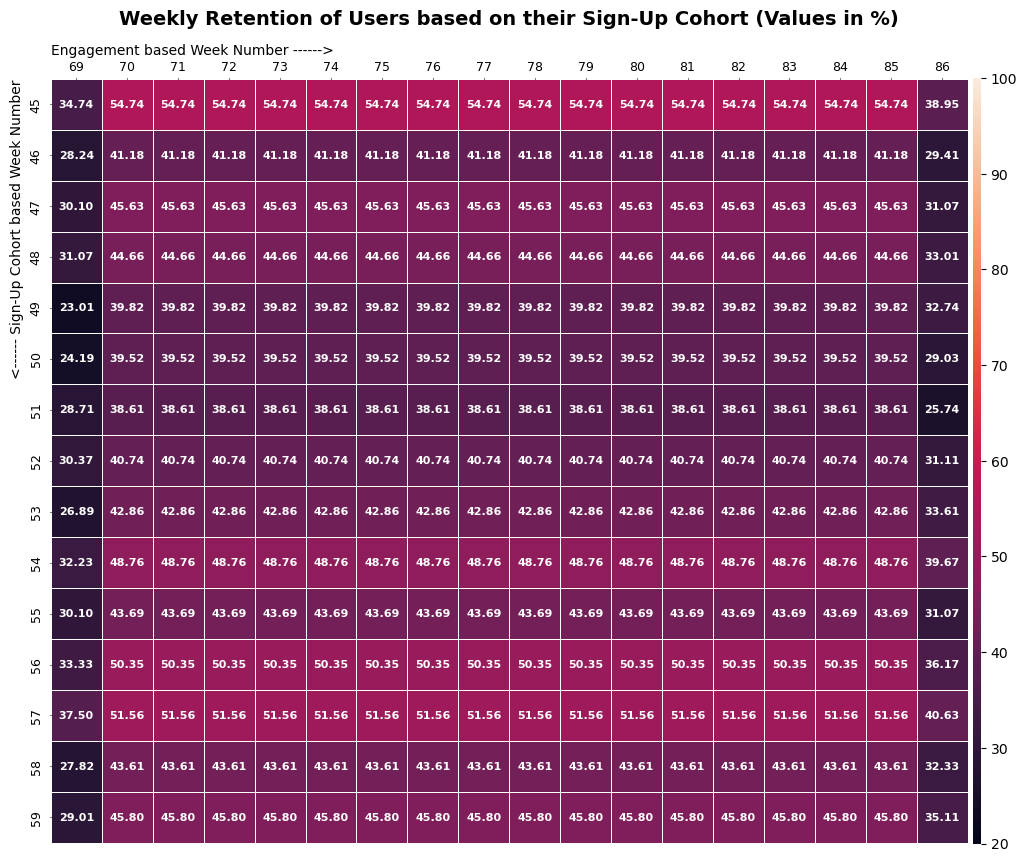

In [28]:
fig, ax=plt.subplots(1,1, figsize=(14,14))

hm=sns.heatmap(df4[45:60], vmin=20, vmax=100, annot=True, fmt=".2f", annot_kws={'fontsize': 8, 'fontweight': 'semibold'}, linewidths=0.5, cbar=True, cbar_kws={'aspect':100, 'shrink': 0.71, 'pad': 0.005}, square=True)

hm.tick_params(axis='x', pad=3, length=1, labelsize=9)
hm.xaxis.tick_top()
hm.set_xlabel("Engagement based Week Number ------>", loc='left')
hm.xaxis.set_label_position('top') 

hm.tick_params(axis='y', pad=5, length=1, labelsize=9)
hm.set_ylabel("<------ Sign-Up Cohort based Week Number", loc='top')

hm.set_title("Weekly Retention of Users based on their Sign-Up Cohort (Values in %)", y=1.06, fontsize=14, fontweight='semibold')

plt.show()

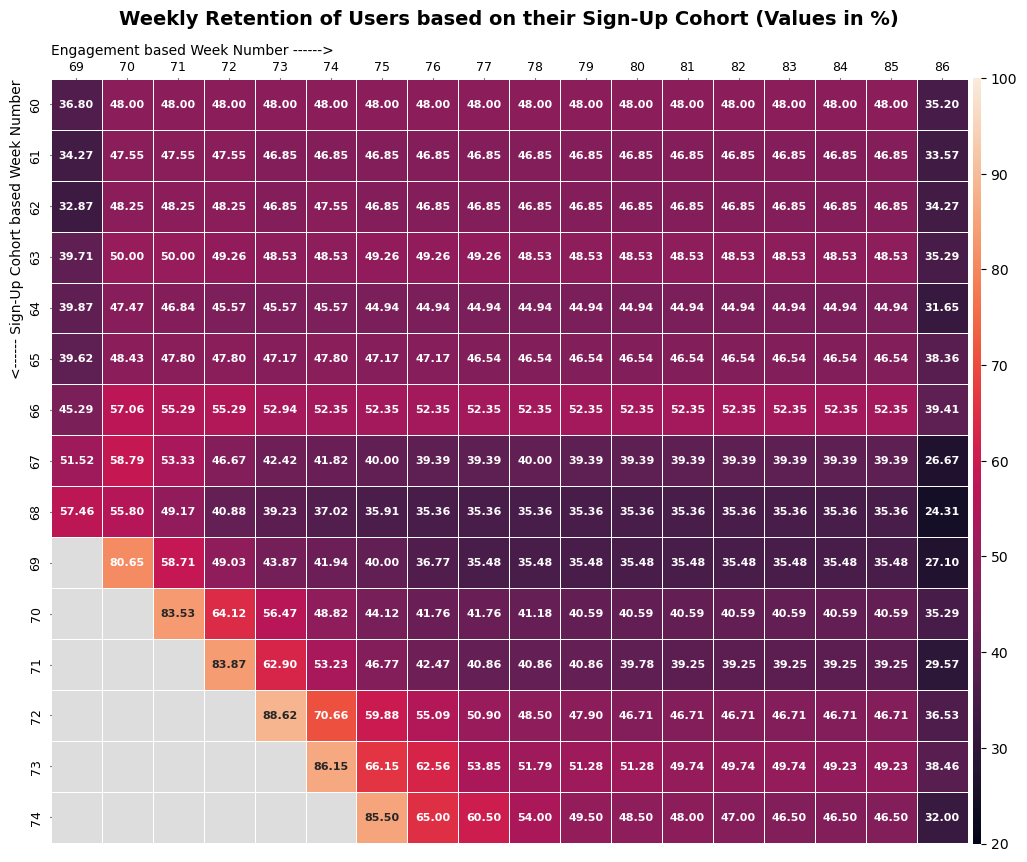

In [29]:
fig, ax=plt.subplots(1,1, figsize=(14,14))

hm=sns.heatmap(df4[60:75], vmin=20, vmax=100, annot=True, fmt=".2f", annot_kws={'fontsize': 8, 'fontweight': 'semibold'}, linewidths=0.5, cbar=True, cbar_kws={'aspect':100, 'shrink': 0.71, 'pad': 0.005}, mask=msk[60:75], square=True)
hm.set_facecolor('#dddddd')

hm.tick_params(axis='x', pad=3, length=1, labelsize=9)
hm.xaxis.tick_top()
hm.set_xlabel("Engagement based Week Number ------>", loc='left')
hm.xaxis.set_label_position('top') 

hm.tick_params(axis='y', pad=5, length=1, labelsize=9)
hm.set_ylabel("<------ Sign-Up Cohort based Week Number", loc='top')

hm.set_title("Weekly Retention of Users based on their Sign-Up Cohort (Values in %)", y=1.06, fontsize=14, fontweight='semibold')

plt.show()

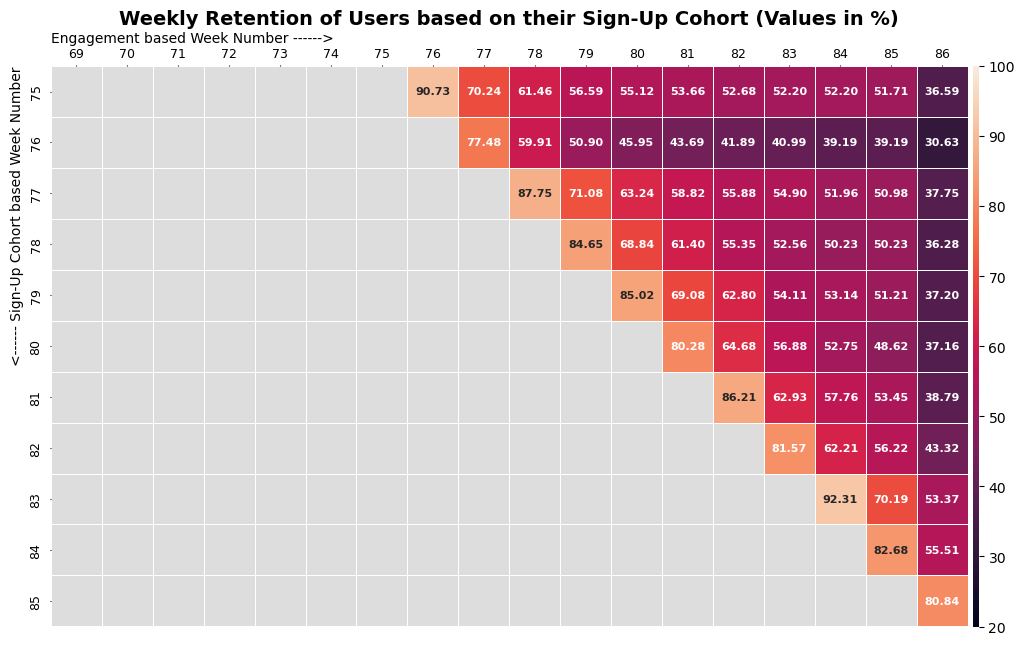

In [30]:
fig, ax=plt.subplots(1,1, figsize=(14,14))

hm=sns.heatmap(df4[75:86], vmin=20, vmax=100, annot=True, fmt=".2f", annot_kws={'fontsize': 8, 'fontweight': 'semibold'}, linewidths=0.5, cbar=True, cbar_kws={'aspect':100, 'shrink': 0.52, 'pad': 0.005}, mask=msk[75:86], square=True)
hm.set_facecolor('#dddddd')

hm.tick_params(axis='x', pad=3, length=1, labelsize=9)
hm.xaxis.tick_top()
hm.set_xlabel("Engagement based Week Number ------>", loc='left')
hm.xaxis.set_label_position('top') 

hm.tick_params(axis='y', pad=5, length=1, labelsize=9)
hm.set_ylabel("<------ Sign-Up Cohort based Week Number", loc='top')

hm.set_title("Weekly Retention of Users based on their Sign-Up Cohort (Values in %)", y=1.06, fontsize=14, fontweight='semibold')

plt.show()

In [44]:
query1='''SELECT user_id, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', activated_at) as week_no
        FROM cs_2_t_1 
        WHERE state = \'active\''''

query2='''SELECT user_id, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', DATE_FORMAT(STR_TO_DATE(occurred_at, \'%d-%m-%Y %H:%i\'), \'%Y-%m-%d %H:%i:%S\')) as week_no, event_name as ev
        FROM cs_2_t_2 
        WHERE event_type = \'engagement\'
        
        UNION ALL
        
        SELECT user_id, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', occurred_at) as week_no, action as ev
        FROM cs_2_t_3
        
        ORDER BY user_id, week_no'''

query3='''SELECT q1.user_id AS q1id, q1.week_no AS q1wn, q2.user_id AS q2id, q2.week_no AS q2wn, q2.ev as q2ev
        FROM ({0}) AS q1 
        LEFT OUTER JOIN ({1}) AS q2 
        ON q1.user_id=q2.user_id
        
        UNION
        
        SELECT q1.user_id AS q1id, q1.week_no AS q1wn, q2.user_id AS q2id, q2.week_no AS q2wn, q2.ev as q2ev
        FROM ({0}) AS q1 
        RIGHT OUTER JOIN ({1}) AS q2 
        ON q1.user_id=q2.user_id'''.format(query1, query2)

query4='''SELECT q3.q1id AS q3id, q3.q1wn AS q3wn1, q3.q2wn AS q3wn2, q3.q2ev as q3ev
        FROM ({0}) AS q3
        ORDER BY q3wn1, q3wn2'''.format(query3)

query5='''SELECT q1_.week_no AS q5wn, COUNT(q1_.user_id) AS ttl_ui_cnt
        FROM ({0}) AS q1_
        GROUP BY q5wn'''.format(query1)

query6='''SELECT q4.q3wn1 AS q4wn1, q4.q3wn2 AS q4wn2, COUNT(q4.q3id) AS cnt_q4id 
        FROM ({0}) AS q4
        GROUP BY q3wn1, q3wn2'''.format(query4)

query7='''SELECT q6.q5wn AS q6wn, q7.q4wn2 AS q7wn2, ROUND((100*q7.cnt_q4id/q6.ttl_ui_cnt),2) AS perc_ret
        FROM ({0}) AS q6
        JOIN ({1}) AS q7
        ON (q6.q5wn=q7.q4wn1 AND q6.q5wn<q7.q4wn2)
        ORDER BY q6wn, q7wn2'''.format(query5, query6)

dft1=pd.read_sql_query(query4, conn)

In [113]:
dft1.head(5)

,q3id,q3wn1,q3wn2,q3ev
0,3,0,NaN,None
1,6,0,NaN,None
2,7,0,NaN,None
3,13,0,NaN,None
4,15,0,NaN,None


In [100]:
dft1[(dft1['q3wn1']==0) & (dft1['q3wn2']==69)]['q3ev'].value_counts()

q3ev
sent_weekly_digest    6
login                 3
like_message          3
home_page             2
view_inbox            2
email_open            1
send_message          1
Name: count, dtype: int64

In [102]:
dft1[(dft1['q3wn1']==10) & (dft1['q3wn2']==69)]['q3ev'].value_counts()

q3ev
sent_weekly_digest        9
login                     5
home_page                 5
view_inbox                4
like_message              4
send_message              3
email_open                3
search_run                2
email_clickthrough        2
search_autocomplete       1
search_click_result_2     1
search_click_result_4     1
search_click_result_5     1
search_click_result_9     1
search_click_result_1     1
search_click_result_7     1
search_click_result_3     1
search_click_result_6     1
search_click_result_10    1
Name: count, dtype: int64

In [105]:
dft1[(dft1['q3wn1']==52) & (dft1['q3wn2']==69)]['q3ev'].value_counts()

q3ev
sent_weekly_digest       39
login                     8
home_page                 8
view_inbox                7
email_open                7
like_message              6
send_message              4
search_run                3
email_clickthrough        3
search_click_result_2     1
search_click_result_1     1
search_click_result_3     1
search_click_result_4     1
Name: count, dtype: int64

Weekly Engagement Per Device:
Objective: Measure the activeness of users on a weekly basis per device.
Your Task: Write an SQL query to calculate the weekly engagement per device.

In [24]:
query1='''SELECT device, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', DATE_FORMAT(STR_TO_DATE(occurred_at, \'%d-%m-%Y %H:%i\'), \'%Y-%m-%d %H:%i:%S\')) AS wk, COUNT(user_id) as Cnt  
        FROM cs_2_T_2
        WHERE event_type = \'engagement\'
        GROUP BY device, wk 
        ORDER BY device'''

query2='''SELECT device AS Device, ROUND(AVG(q1.Cnt), 2) AS Avg_Week_Eng_P_Dev
        FROM ({}) AS q1 
        GROUP BY device 
        ORDER BY Avg_Week_Eng_P_Dev DESC'''.format(query1)

df5=pd.read_sql_query(query2, conn)

In [25]:
df5

,Device,Avg_Week_Eng_P_Dev
0,macbook pro,3148.33
1,lenovo thinkpad,2032.39
2,macbook air,1471.22
3,iphone 5,1420.89
4,dell inspiron notebook,1081.67
5,samsung galaxy s4,1024.22
6,nexus 5,907.33
7,iphone 5s,874.67
8,dell inspiron desktop,557.61
9,iphone 4s,528.11


In [27]:
dfi.export(df5[0:13], "2Da.png")
dfi.export(df5[13:], "2Db.png")

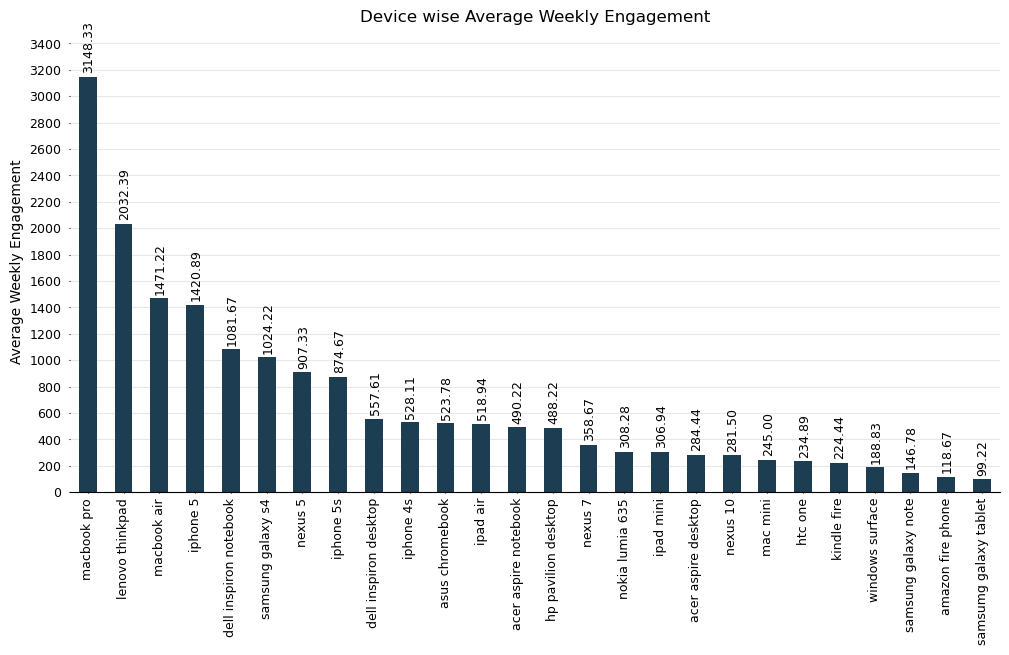

In [26]:
fig, ax=plt.subplots(1,1, figsize=(12,6))

ax=df5['Avg_Week_Eng_P_Dev'].plot.bar(ylim=(0,3500), rot=0, ylabel="Average Weekly Engagement", title="Device wise Average Weekly Engagement", color='#1c3d52')

for r in ax.patches:
    ax.annotate(f"{r.get_height():.2f}", xy=(r.get_x()+0.1, r.get_y()+r.get_height()+50), rotation=90, size=9)
    
x_tck=df5['Device'].values 
ax.set_xticks(ticks=list(range(0,26)), labels=x_tck)
ax.tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=90)
ax.set_yticks(ticks=list(range(0, 3500, 200)))
ax.tick_params(axis='y', pad=5, length=1, labelsize=9)

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# The axis lines from top, left and right are removed
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

In [30]:
query1='''SELECT 
        CASE
            WHEN INSTR(device, \'mac\') OR INSTR(device, \'macbook\') OR INSTR(device, \'iphone\') OR INSTR(device, '\ipad\') THEN \'APPLE\'
            WHEN INSTR(device, \'dell\') THEN \'DELL\' WHEN INSTR(device, \'windows\') THEN \'MICROSOFT\'
            WHEN INSTR(device, \'kindle\') OR LOCATE(\'amazon\', device) THEN \'AMAZON\'
            WHEN INSTR(device, \'samsung\') OR INSTR(device, \'samsumg\') THEN \'SAMSUNG\'
            WHEN INSTR(device, \'lenovo\') THEN \'LENOVO\' WHEN INSTR(device, \'nexus\') THEN \'LG\'
            WHEN INSTR(device, \'acer\') THEN \'ACER\' WHEN INSTR(device, \'asus\') THEN \'ASUS\'
            WHEN INSTR(device, \'htc\') THEN \'HTC\' WHEN INSTR(device, \'nokia\') THEN \'NOKIA\'
            WHEN INSTR(device, \'hp\') THEN \'HP\'
            ELSE \'NO COMPANY\'
        END AS Company, 
        TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', DATE_FORMAT(STR_TO_DATE(occurred_at, \'%d-%m-%Y %H:%i\'), \'%Y-%m-%d %H:%i:%S\')) AS wk, 
        COUNT(user_id) AS cnt 
        FROM cs_2_t_2
        WHERE event_type = \'engagement\'
        GROUP BY Company, wk
         
        ORDER BY Company'''

query2='''SELECT Company, ROUND(AVG(q1.Cnt), 2) AS Avg_Week_Eng_P_Com
        FROM ({}) AS q1 
        GROUP BY Company 
        ORDER BY Avg_Week_Eng_P_Com DESC'''.format(query1)

df6=pd.read_sql_query(query2, conn)

In [31]:
df6

,Company,Avg_Week_Eng_P_Com
0,APPLE,8514.11
1,LENOVO,2032.39
2,DELL,1639.28
3,LG,1547.50
4,SAMSUNG,1270.22
5,ACER,774.67
6,ASUS,523.78
7,HP,488.22
8,AMAZON,343.11
9,NOKIA,308.28


In [32]:
dfi.export(df6, "2Dc.png")

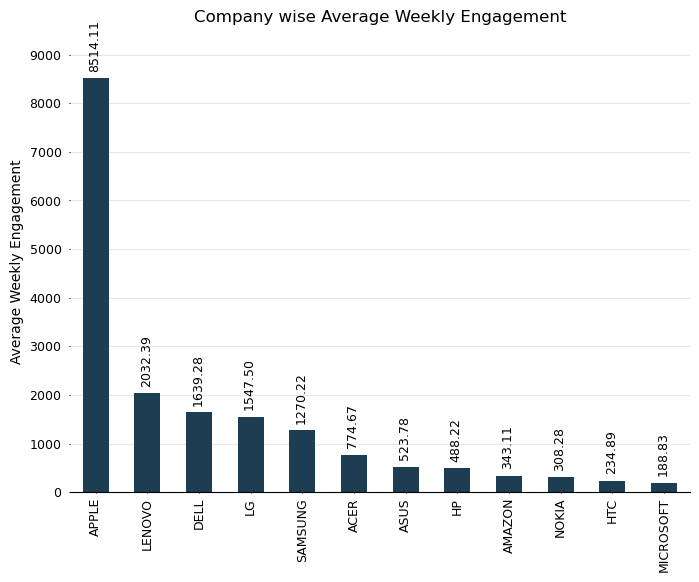

In [33]:
fig, ax=plt.subplots(1,1, figsize=(8,6))

ax=df6['Avg_Week_Eng_P_Com'].plot.bar(ylim=(0,9500), rot=0, ylabel="Average Weekly Engagement", title="Company wise Average Weekly Engagement", color='#1c3d52')

for r in ax.patches:
    ax.annotate(f"{r.get_height():.2f}", xy=(r.get_x()+0.1, r.get_y()+r.get_height()+200), rotation=90, size=9)
    
x_tck=df6['Company'].values 
ax.set_xticks(ticks=list(range(0,12)), labels=x_tck)
ax.tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=90)
ax.set_yticks(ticks=list(range(0, 10000, 1000)))
ax.tick_params(axis='y', pad=5, length=1, labelsize=9)

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# The axis lines from top, left and right are removed
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

Email Engagement Analysis:
Objective: Analyze how users are engaging with the email service.
Your Task: Write an SQL query to calculate the email engagement metrics.

In [116]:
query1='''SELECT action, TIMESTAMPDIFF(WEEK, \'2013-01-01 04:40:10\', occurred_at) AS wk, COUNT(user_id) as Cnt  
        FROM cs_2_t_3
        GROUP BY action, wk
        ORDER BY action'''

query2='''SELECT action, ROUND(AVG(q1.Cnt), 2) AS Avg_Week_Email_Eng
        FROM ({}) AS q1 
        GROUP BY action 
        ORDER BY Avg_Week_Email_Eng DESC'''.format(query1)

df7=pd.read_sql_query(query2, conn)

In [117]:
df7

,action,Avg_Week_Email_Eng
0,sent_weekly_digest,3181.50
1,email_open,1136.61
2,email_clickthrough,500.56
3,sent_reengagement_email,202.94


In [118]:
dfi.export(df7, "2E.png")